In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
event_info = pd.read_csv('Wind Farm B/event_info.csv', delimiter=";")
feature_description = pd.read_csv('Wind Farm B/feature_description.csv', delimiter=";")
sensor_data = pd.read_csv('Wind Farm B/datasets/34.csv', delimiter=";")

In [3]:
# Convert time_stamp to datetime
sensor_data['time_stamp'] = pd.to_datetime(sensor_data['time_stamp'])
event_info['event_start'] = pd.to_datetime(event_info['event_start'])
event_info['event_end'] = pd.to_datetime(event_info['event_end'])

In [4]:
# Identify and visualize missing values
missing_data = sensor_data.isnull().sum()
print("Missing values per column:\n", missing_data[missing_data > 0])

Missing values per column:
 power_62_max    1
dtype: int64


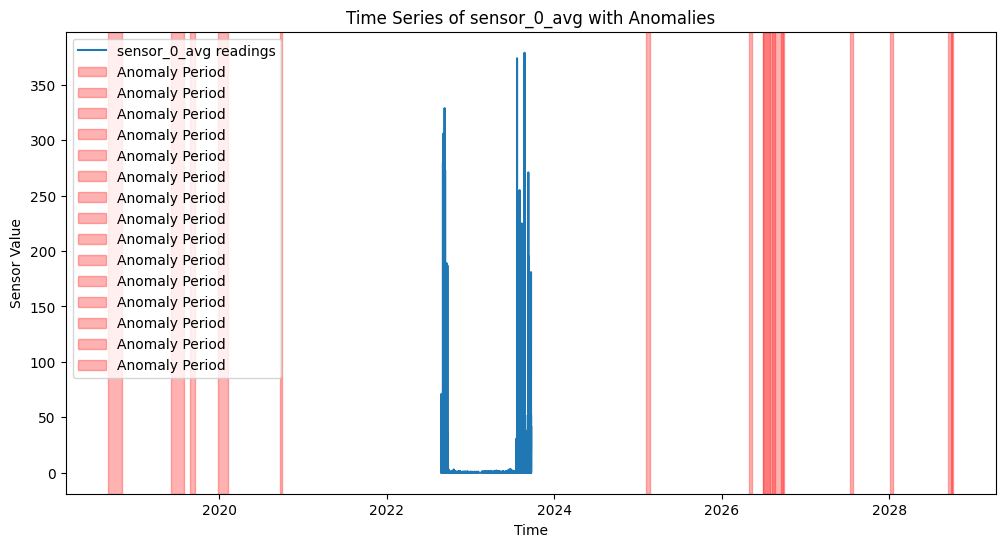

In [5]:
# Visualize a sensor's time series with anomalies
sensor_name = 'sensor_0_avg'
plt.figure(figsize=(12, 6))
plt.plot(sensor_data['time_stamp'], sensor_data[sensor_name], label=f'{sensor_name} readings')
for _, row in event_info.iterrows():
    plt.axvspan(row['event_start'], row['event_end'], color='red', alpha=0.3, label='Anomaly Period')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title(f'Time Series of {sensor_name} with Anomalies')
plt.legend()    
plt.show()

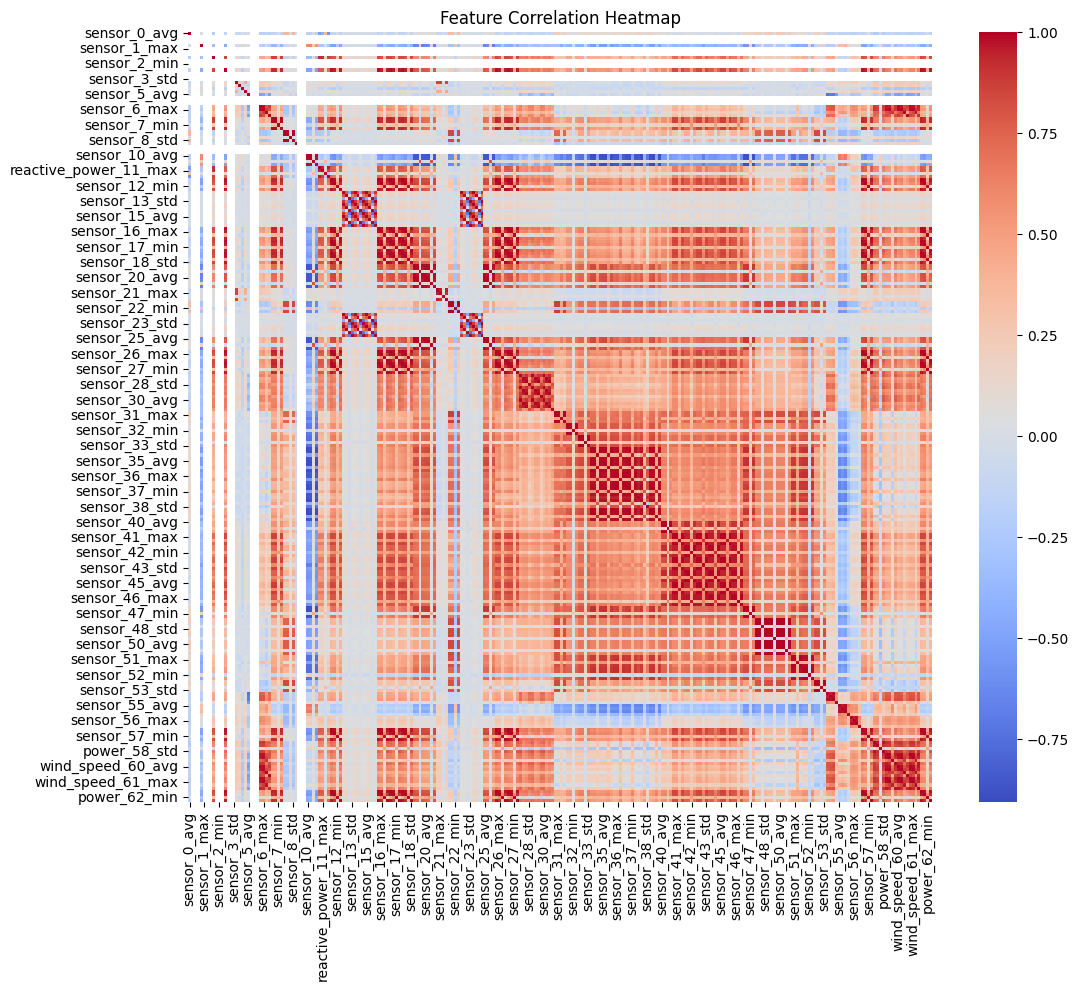

In [6]:
# Feature correlation heatmap
correlation = sensor_data.iloc[:, 5:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Identified 688 potential anomalies in sensor_0_avg.


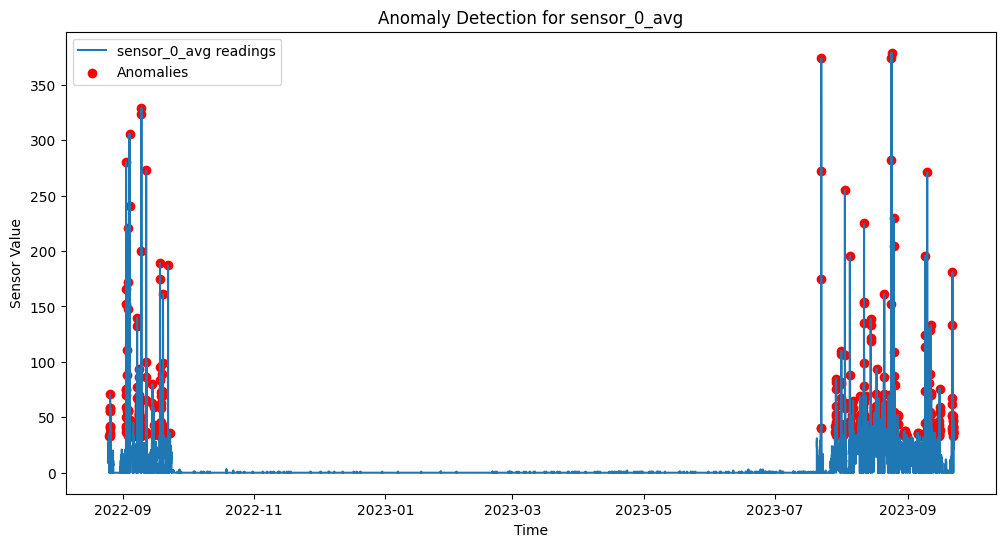

In [7]:
# Identify potential anomalies using standard deviation
def identify_anomalies(data, feature, threshold=3):
    mean = data[feature].mean()
    std_dev = data[feature].std()
    anomalies = data[(data[feature] > mean + threshold * std_dev) | (data[feature] < mean - threshold * std_dev)]
    return anomalies

anomalies = identify_anomalies(sensor_data, sensor_name)
print(f"Identified {len(anomalies)} potential anomalies in {sensor_name}.")
plt.figure(figsize=(12, 6))
plt.plot(sensor_data['time_stamp'], sensor_data[sensor_name], label=f'{sensor_name} readings')
plt.scatter(anomalies['time_stamp'], anomalies[sensor_name], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title(f'Anomaly Detection for {sensor_name}')
plt.legend()
plt.show()